In [1]:
import pandas as pd

df = pd.read_csv("data/house.csv")
house_data = df.drop(["id", "date"], axis=1)

In [2]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(["price"], axis=1)
target_data = house_data["price"]

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2)

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

print("all data", train_data.shape)
print("train set", x_train.shape, y_train.shape)
# print("valid set", x_valid.shape, y_valid.shape)
print("test set", x_test.shape, y_test.shape)

all data (21613, 18)
train set (17290, 18) (17290,)
test set (4323, 18) (4323,)


In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print("train set score", lr.score(x_train, y_train))
# print("train set score", lr.score(x_valid, y_valid))

train set score 0.6980900301783164


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                     LinearRegression())
model.fit(x_train, y_train)

print("train set score", model.score(x_train, y_train))
# print("train set score", model.score(x_valid, y_valid))

train set score 0.8288428280423856


In [5]:
model3 = make_pipeline(PolynomialFeatures(3),
                     LinearRegression())
model3.fit(x_train, y_train)

print("train set score", model3.score(x_train, y_train))
# print("train set score", model3.score(x_valid, y_valid))

train set score 0.8046945491615908


In [6]:
my_data = pd.Series({
    "bedrooms": 2,
    "bathrooms": 2.5,
    "sqft_living": 3000,
    "sqft_lot": 5500,
    "floors": 4,
    "waterfront": 0,
    "view": 0,
    "condition": 3,
    "grade": 9,
    "sqft_above": 2350,
    "sqft_basement": 500,
    "yr_built": 2002,
    "yr_renovated": 0,
    "zipcode": 98000,
    "lat": 47.5317,
    "long": -122.391,
    "sqft_living15": 2900,
    "sqft_lot15": 3900
})

my_df = pd.DataFrame([my_data])

lr.predict(my_df)

array([880658.54131526])

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

print("train set score", tree.score(x_train, y_train))
# print("train set score", tree.score(x_valid, y_valid))

train set score 0.9993134169809876


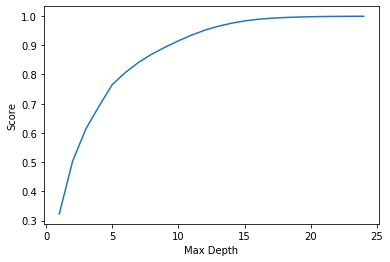

In [9]:
import matplotlib.pyplot as plt

train_score = []
# valid_score = []
depth_range = range(1, 25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth=depth).fit(x_train, y_train)
    train_score.append(tree.score(x_train, y_train))
#     valid_score.append(tree.score(x_valid, y_valid))

plt.plot(depth_range, train_score)
# plt.plot(depth_range, valid_score)

# plt.legend(["Train", "Valid"])

plt.xlabel("Max Depth")
plt.ylabel("Score")

plt.show()

In [10]:
print("train set score", tree.score(x_test, y_test))

train set score 0.7357646183368398
